<a href="https://colab.research.google.com/github/2IS239-Data-Analytics/Code_along_1/blob/main/Analysing_Twitter_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tweepy as tw
import pandas as pd
from google.colab import drive  # to mount Drive to Colab notebook


In [ ]:
# Connect Google Drive to Colab
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
# Create a variable to store the data path on your drive
path = './gdrive/My Drive/Data_DA_HT21'

In [ ]:
import json

# Enter your keys/secrets as strings in the following fields
credentials = {}
credentials['CONSUMER_KEY'] = #Insert your key
credentials['CONSUMER_SECRET'] = #Insert your key here
credentials['ACCESS_TOKEN'] =  #Insert your key
credentials['ACCESS_SECRET'] =  #Insert your key

# Save the credentials object to file
with open(path + "/secrets.json", "w") as file:
    json.dump(credentials, file)

In [ ]:
# Load Twitter API secrets from an external JSON file
secrets = json.loads(open(path + 'secrets.json').read())
consumer_key = secrets['CONSUMER_KEY']
consumer_secret = secrets['CONSUMER_SECRET']
access_token = secrets['ACCESS_TOKEN']
access_token_secret = secrets['ACCESS_SECRET']


In [ ]:
from tweepy import OAuthHandler
from tweepy import API

# Consumer key authentication(consumer_key,consumer_secret can be collected from our twitter developer profile)
auth = OAuthHandler(consumer_key, consumer_secret)

# Access key authentication(access_token,access_token_secret can be collected from our twitter developer profile)
auth.set_access_token(access_token, access_token_secret)

# Set up the API with the authentication handler
api = API(auth)

In [ ]:
# Define the search term and the date_since date as variables
search_words = "#översvämning"
#search_words = "#flooding"
date_since = "2021-08-01"

In [ ]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="sv",
              #lang="en",
              since=date_since).items()
tweets


In [ ]:
for tweet in tweets:
    print(tweet.text)

RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…
RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…
RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…
RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…
RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…
RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…
RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…
Översvämning 

In [ ]:
#Ta bort re-tweets
new_search = search_words + " -filter:retweets"
new_search

'#översvämning -filter:retweets'

In [ ]:
# Collect tweets
tweets_no_retweet = tw.Cursor(api.search,
              q=new_search,
              lang="sv",
              #lang="en",
              since=date_since).items()
tweets_no_retweet


In [ ]:
# Iterate and print tweets
for tweet in tweets_no_retweet:
    print(tweet.text)
    

Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala oc… https://t.co/ylSF2jQUwi


Ladda tweets i en lista istället

In [ ]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="sv",
              #lang="en",
              since=date_since).items(50)

# Save a list of tweets, only the text field.
tweet_list= [tweet.text for tweet in tweets]
#Skriv ut lista
tweet_list

['RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…',
 'RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…',
 'RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…',
 'RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…',
 'RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…',
 'RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…',
 'RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normal

In [ ]:
#Vem har twittrat?
tweets = tw.Cursor(api.search,
                       q=new_search,
                       lang="sv",
                       since=date_since).items(5)
                       
users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
users_locs

[['Sjobergbild', 'Vilhelmina, Sverige']]

En tweet levereras från twitters API som ett JSON objekt. För att hämta ett antal tweets och spara texten och det datum de skapats från dem i en csv-fil kan följande kod användas. Det går också att spara direkt som en JSON-fil.

In [ ]:
import csv

# Open/Create a file to append data
csvFile = open(path + '/tweets_oversvamning.csv', 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile)

for tweet in tw.Cursor(api.search,q=search_words,count=100,
                           lang="sv",
                           since=date_since).items(10):
    print (tweet.created_at, tweet.text)
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

2021-08-31 20:21:42 RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…
2021-08-31 17:34:22 RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…
2021-08-31 13:26:24 RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…
2021-08-31 10:23:54 RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…
2021-08-31 08:01:33 RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…
2021-08-31 08:00:11 RT @Sjobergbild: Översvämning i Bollnäs 1916. Ljusnan har stigit till en rekordhög nivå i maj med hela 6,4 meter över det normala och samhä…
2021-08-31 07:41:58 RT @Sjobergbil

# Det finns mängder med interna metoder för ett enda Twitterobjekt i Tweepy. VI hämtar alla tweets från en specifik användare och tittar på vilken information vi kan extrahera från en tweet.

In [ ]:
# We create a tweet list as follows:
tweets_svt = api.user_timeline(screen_name="svtnyheter", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets_svt)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets_svt[:5]:
    print(tweet.text)
    print()


Number of tweets extracted: 200.

5 recent tweets:

Uppdraget blir att motverka fusk och utbetalningar genom ”systemövergripande analyser av utbetalningar från välfärd… https://t.co/RB2UHStJb1

"Den ena anklagas av kurdiska myndigheter för att ha försökt rekrytera andra svenskor under sin tid i Sverige."

https://t.co/LSaW1tZq6D

Under 10 års tid har 28 grundskolor runt om i landet haft långvarigt låga kunskapsresultat, långt under riksgenomsn… https://t.co/r4U9ylB7PS

Daniel Ståhl gjorde ingen förvånad när han tog hem herrarnas diskus i Finnkampen.

https://t.co/Bacvu9XVpY

”Oliver lämnade oss plötsligt och jag och hans familj och vänner är i stor sorg”, skriver skådespelarens syster Jos… https://t.co/vbsmO2zYii



In [ ]:
# Internal methods of a single tweet object:
dir(tweets_svt[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_json',
 'author',
 'contributors',
 'coordinates',
 'created_at',
 'destroy',
 'entities',
 'favorite',
 'favorite_count',
 'favorited',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'parse',
 'parse_list',
 'place',
 'possibly_sensitive',
 'retweet',
 'retweet_count',
 'retweeted',
 'retweets',
 'source',
 'source_url',
 'text',
 'truncated',
 'user']

# Dags för nästa steg, data wrangling och deskriptiv statistik för att lära känna vår datamängd.

In [ ]:
import nltk as tm
from nltk.corpus import stopwords
import wordcloud
import matplotlib
from sklearn.feature_extraction.text import CountVectorizer
# Sätt upp visualiseringen
%matplotlib inline
matplotlib.pyplot.rcParams['figure.figsize'] = [10, 6]

In [ ]:
#lägg data i en dataframe

svt_tweets = pd.DataFrame(data=[tweet.text for tweet in tweets_svt], columns=['Tweets'])
svt_tweets



,Tweets
0,Uppdraget blir att motverka fusk och utbetalni...
1,"""Den ena anklagas av kurdiska myndigheter för ..."
2,Under 10 års tid har 28 grundskolor runt om i ...
3,Daniel Ståhl gjorde ingen förvånad när han tog...
4,”Oliver lämnade oss plötsligt och jag och hans...
...,...
195,Olof Palmes grav på Adolf Fredriks kyrkogård i...
196,Polisen benämner händelserna som en naturkatas...
197,Omkring 30 000 familjer har fått sina hem förs...
198,Tidigare i somras rapporterades det om sjöar i...


In [ ]:
#lite mer information om varje tweet som kan vara intressant
svt_tweets['len']  = [len(x.text) for x in tweets_svt]  # number of characters in a tweet (think length)
svt_tweets['ID']   = [x.id for x in tweets_svt]
svt_tweets['Source'] = [x.source for x in tweets_svt]
svt_tweets['Likes']  = [x.favorite_count for x in tweets_svt] # favorite_count
svt_tweets['RTs']    =  [x.retweet_count for x in tweets_svt]  # retweet count

svt_tweets

,Tweets,len,ID,Source,Likes,RTs
0,Uppdraget blir att motverka fusk och utbetalni...,140,1434779703521550336,Twitter Web App,0,0
1,"""Den ena anklagas av kurdiska myndigheter för ...",136,1434776000177573889,Twitter Web App,2,2
2,Under 10 års tid har 28 grundskolor runt om i ...,140,1434745784214372354,Twitter Web App,10,6
3,Daniel Ståhl gjorde ingen förvånad när han tog...,106,1434530760325664771,Twitter Web App,45,1
4,”Oliver lämnade oss plötsligt och jag och hans...,140,1434517422892060677,Twitter Web App,20,6
...,...,...,...,...,...,...
195,Olof Palmes grav på Adolf Fredriks kyrkogård i...,119,1427988904838316033,Twitter Web App,42,20
196,Polisen benämner händelserna som en naturkatas...,140,1427966288438210562,Twitter Web App,31,15
197,Omkring 30 000 familjer har fått sina hem förs...,136,1427911995873955840,Twitter Web App,19,6
198,Tidigare i somras rapporterades det om sjöar i...,140,1427892509959761920,Twitter Web App,13,6


Lite mer funktioner för att bekanta oss med den textdata vi ska analysera..

In [ ]:
svt_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  200 non-null    object
 1   len     200 non-null    int64 
 2   ID      200 non-null    int64 
 3   Source  200 non-null    object
 4   Likes   200 non-null    int64 
 5   RTs     200 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 9.5+ KB


In [ ]:
svt_tweets.shape

(200, 6)

# Städning av textdata

In [ ]:
#Vi är ju faktiskt bara intresserade av fritexten i varje tweet, plocka ut denna kolumn
tweets_corpus = svt_tweets.Tweets
tweets_corpus

0      Uppdraget blir att motverka fusk och utbetalni...
1      "Den ena anklagas av kurdiska myndigheter för ...
2      Under 10 års tid har 28 grundskolor runt om i ...
3      Daniel Ståhl gjorde ingen förvånad när han tog...
4      ”Oliver lämnade oss plötsligt och jag och hans...
                             ...                        
195    Olof Palmes grav på Adolf Fredriks kyrkogård i...
196    Polisen benämner händelserna som en naturkatas...
197    Omkring 30 000 familjer har fått sina hem förs...
198    Tidigare i somras rapporterades det om sjöar i...
199    Under tisdagen skrevs siffrorna över antalet o...
Name: Tweets, Length: 200, dtype: object

In [ ]:
#Ta bort emojiis
encode2ascii = lambda x: x.encode('ascii', errors='ignore').decode('utf-8')
clean_tweets = tweets_corpus.apply(encode2ascii)
clean_tweets

0      Uppdraget blir att motverka fusk och utbetalni...
1      "Den ena anklagas av kurdiska myndigheter fr a...
2      Under 10 rs tid har 28 grundskolor runt om i l...
3      Daniel Sthl gjorde ingen frvnad nr han tog hem...
4      Oliver lmnade oss pltsligt och jag och hans fa...
                             ...                        
195    Olof Palmes grav p Adolf Fredriks kyrkogrd i S...
196    Polisen benmner hndelserna som en naturkatastr...
197    Omkring 30 000 familjer har ftt sina hem frstr...
198    Tidigare i somras rapporterades det om sjar i ...
199    Under tisdagen skrevs siffrorna ver antalet of...
Name: Tweets, Length: 200, dtype: object

In [ ]:
#Ta på URL:er
clean_tweets = clean_tweets.str.replace(r'http\S+', '')
clean_tweets

0      Uppdraget blir att motverka fusk och utbetalni...
1      "Den ena anklagas av kurdiska myndigheter fr a...
2      Under 10 rs tid har 28 grundskolor runt om i l...
3      Daniel Sthl gjorde ingen frvnad nr han tog hem...
4      Oliver lmnade oss pltsligt och jag och hans fa...
                             ...                        
195    Olof Palmes grav p Adolf Fredriks kyrkogrd i S...
196    Polisen benmner hndelserna som en naturkatastr...
197    Omkring 30 000 familjer har ftt sina hem frstr...
198    Tidigare i somras rapporterades det om sjar i ...
199    Under tisdagen skrevs siffrorna ver antalet of...
Name: Tweets, Length: 200, dtype: object

När vi städat klart behöver vi skapa en datamängd som vi kan analysera, hur det bör göras beror på vad vi vill analysera. I detta fall vill vi undersöka trender, eller ofta förekommande ämnen. För detta är en möjlighet att räkna ord (det gör man generellt "alltid" när man jobbar med NLP). 

Vad vi behöver då är en Term Document Matrix (TDM), också kallad Document Term Matrix (DTM). En TDM är en tabell som fångar antal ord i ett dokument. Exempelvis kan vi räkna ord i varje tweet och slagra detta i en rad i vår TDM. 

Vi kan dessutom förvänta oss att behöva utföra detta flera gånger, och därmed vill vi ha en funktion för detta. 

In [ ]:
tm.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopWords = set(stopwords.words('swedish'))
#stopWords

In [ ]:
#definiera en funktion som tar ett corpus med text och det antal som ett ord måste förkomma för att vara med i matrisen (en gång här)
def create_term_document_matrix(corpus, min_df=1):
    #Instansiera objektet med givna inparametrar
    cvec = CountVectorizer(min_df=min_df, stop_words=stopWords)
    #Skapa en matris för hela corpuset 
    tfmatrix = cvec.fit_transform(corpus)
    #Returnera den skapade matrisen som en DataFrame
    return pd.DataFrame(data=tfmatrix.toarray(), columns=cvec.get_feature_names())

In [ ]:
create_term_document_matrix(clean_tweets.head(5))

,10,28,analyser,andra,anklagas,daniel,diskus,ena,familj,finnkampen,fr,frn,frskt,frvnad,fusk,genom,gjorde,grundskolor,haft,hem,herrarnas,jos,kunskapsresultat,kurdiska,landet,lga,lmnade,lngt,lngvarigt,motverka,myndigheter,nr,oliver,pltsligt,rekrytera,riksgenomsn,rs,runt,skdespelarens,skriver,sorg,sthl,stor,svenskor,sverige,systemvergripande,syster,tid,tog,uppdraget,utbetalningar,vlfrd,vnner
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2,1,0
1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1


In [ ]:
#antal rader och kolumner i vår TDM, vad betyder det?
_.shape

(5, 53)

För att räkna ut de ord som är mest frekventa så definierar vi en ny funktion, som visulaiserar de mest frekvent förkommande orden.

In [ ]:
def plot_top_words(tweets, num_word_instances, top_words):
    tdm_df = create_term_document_matrix(tweets, min_df=2)
    word_frequencies = tdm_df[[x for x in tdm_df.columns if len(x) > 1]].sum()
    sorted_words = word_frequencies.sort_values(ascending=False)
    top_sorted_words = sorted_words[:num_word_instances]
    top_sorted_words[:top_words].plot.bar()
    return top_sorted_words

fr             41
frn            21
ska            18
usa            17
kommer         15
afghanistan    14
ver            14
sger           14
nr             13
personer       10
vill            9
polisen         9
sverige         8
regeringen      8
svt             8
mnga            7
flera           7
talibanerna     7
kabul           6
sitt            6
dtype: int64

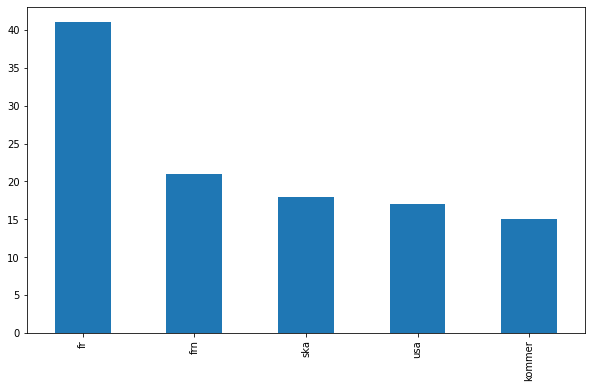

In [ ]:
#vilka ord är mest frekventa i vår sökning?
top_words = plot_top_words(clean_tweets, 20, 5)
top_words

In [ ]:
#gör om stora bokstäver till små
tweets_lowered = clean_tweets.str.lower()

fr             41
frn            21
ska            18
usa            17
kommer         15
afghanistan    14
ver            14
sger           14
nr             13
personer       10
vill            9
polisen         9
sverige         8
regeringen      8
svt             8
mnga            7
flera           7
talibanerna     7
kabul           6
sitt            6
dtype: int64

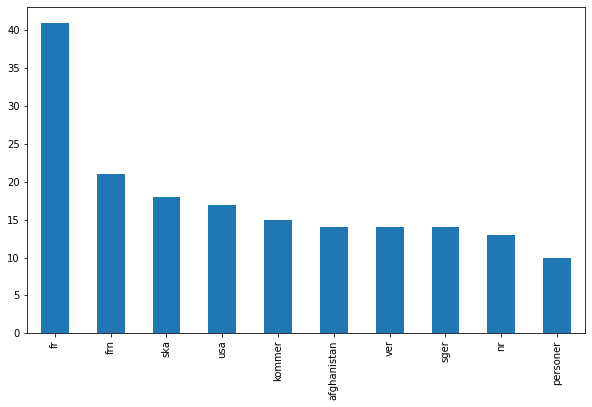

In [ ]:
top_words_lowered = plot_top_words(tweets_lowered, 20, 10)
top_words_lowered

In [ ]:
pd.DataFrame(
    {
        "Top tweeted clean": top_words[0:20].index,
        "Top tweeted lowered": top_words_lowered[0:20].index,
    }
)

,Top tweeted clean,Top tweeted lowered
0,fr,fr
1,frn,frn
2,ska,ska
3,usa,usa
4,kommer,kommer
5,afghanistan,afghanistan
6,ver,ver
7,sger,sger
8,nr,nr
9,personer,personer


In [ ]:
#ta bort ord som är 3 bokstäver eller kortare
tweets_low_no_small = tweets_lowered.str.replace(r"\b\w{1,3}\b", "")
tweets_low_no_small

0      uppdraget blir  motverka fusk  utbetalningar g...
1      "  anklagas  kurdiska myndigheter    frskt rek...
2      under      grundskolor runt   landet haft lngv...
3      daniel sthl gjorde ingen frvnad     herrarnas ...
4      oliver lmnade  pltsligt    hans familj  vnner ...
                             ...                        
195    olof palmes grav  adolf fredriks kyrkogrd  sto...
196    polisen benmner hndelserna   naturkatastrof  v...
197    omkring   familjer   sina  frstrda  jordbvning...
198    tidigare  somras rapporterades   sjar  argenti...
199    under tisdagen skrevs siffrorna  antalet offer...
Name: Tweets, Length: 200, dtype: object

kommer            15
sger              14
afghanistan       14
personer          10
vill               9
polisen            9
regeringen         8
sverige            8
mnga               7
talibanerna        7
flera              7
tidigare           6
sitt               6
andersson          6
kabul              6
svensk             5
landet             5
bara               5
finns              5
mannen             5
kunna              5
enligt             5
person             5
mnniskor           4
finansminister     4
ocks               4
miljarder          4
fler               4
partiledare        4
hela               4
just               4
avgr               4
klart              4
lfven              4
kritik             4
plats              3
fick               3
innan              3
personal           3
kina               3
partiet            3
eslv               3
orkanen            3
kring              3
explosion          3
kronor             3
magdalena          3
mste         

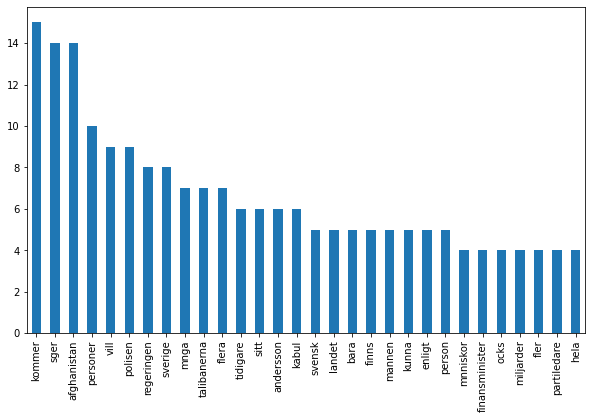

In [ ]:
# Skapar ny topplista utan korta ord
top_words_low_no_small = plot_top_words(tweets_low_no_small, 50, 30)
top_words_low_no_small